In [1]:
import os
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_recall_fscore_support

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import statistics as st
import seaborn as sns

from sklearn.inspection import permutation_importance

import shap

#Import svm model
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  ##Support Vector Machine algorithms are not scale invariant, 

#from SSD import *
##so it is highly recommended to scale your data
    
from sklearn.tree import export_graphviz    

# Convert to png using system command (requires Graphviz)
from subprocess import call

# Display in jupyter notebook
from IPython.display import Image

import warnings

warnings.filterwarnings('ignore')

In [2]:
paths = r'E:\Prasad\IITM\AHRAE-D-RP-1312-EXCEL DATA\Experiment\Fault test\2007summer_added_data'

filess = sorted(glob.glob(paths + '/*.xls'))

fs = [0,1,2,3,4,7,8,14,11,18,19,20]
dfs = pd.DataFrame()

for f in fs:
    datas = pd.read_excel(filess[f], 'A')
    dfs = pd.concat([dfs,datas])
    
dataframe_collections = {}   
for i in range(len(fs)):
    dataframe_collections[i] = dfs.iloc[381+1440*i:1081+1440*i,:]
    
##Missing data in 22/08/2007 
for i in range(len(fs)):
    if dataframe_collections[i].isnull().sum().sum() != 0:   #to check total no of NaN values
        dataframe_collections[i] = dataframe_collections[i].interpolate(method ='linear', limit_direction ='forward')    

b1 = [0,1,2,3,4,5,6,7,8,9,10,11,12]
train_data1 = dataframe_collections[0].iloc[460:700]
for i in range(len(fs)):
    #dataframe_collections[i] = SSD(train_data1,dataframe_collections[i])
    dataframe_collections[i].loc[:,'y']= b1[i] 
    
      
Datas = pd.DataFrame()
for i in range(len(fs)):
    Datas = pd.concat([Datas, dataframe_collections[i]] )        

#Datas= SSD(train_data1,Datas)    
Datas = Datas.reset_index()
Datas = Datas.drop(['index','DATE','TIME'], axis=1)  

In [3]:
faults = [ 'NORMAL','EADOP','EADCL','RFS30','RFCF','OADFC','CCVFC','CCVPO65','HCL3','OADL55','DLASF','DLBSF']

#input_var = ['HWC-VLV', 'CHWC-VLV', 'EA-DMPR', 'RA-DMPR', 'OA-DMPR', 'SF-WAT', 'RF-WAT', 'HWP-GPM', 'CHWP-GPM', 'SAT_SPT', 
  #         'SA_SPSPT', 'SA-CFM', 'OA-CFM', 'SA-TEMP', 'RA-TEMP', 'HWC-DAT', 'CHWC-DAT', 'SA-SP', 'SF-DP','RA-CFM',
  #           'RF-DP', 'SF-SPD', 'RF-SPD', 'SA-HUMD', 'RA-HUMD', 'HWC-EWT','HWC-LWT','CHWC-LWT', 'CHWC-EWT', 'HWP-DP', 'CHWC-EAH', 'HWC_GPM', 'CHWC_GPM', 'E_hcoil', 'E_ccoil','y']

In [4]:
input_var = [ 'CHWC-VLV', 'SF-WAT', 'RF-WAT','SA-TEMP','SF-DP','SF-SPD','EA-DMPR',
           'SA-CFM', 'OA-CFM', 'CHWC-DAT', 'CHWC-LWT', 'SA-SP','RF-SPD','RA-CFM','RA-TEMP',
           'SA-HUMD', 'RF-DP', 'CHWC_GPM', 'E_ccoil','y']

In [5]:
import dice_ml
from dice_ml import Dice


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = Datas[input_var]

outcome_name = "y"
continuous_features = df.drop(outcome_name, axis=1).columns.tolist()
target = df[outcome_name]

In [7]:
datasetX = df.drop(outcome_name, axis=1)
x_train, x_test, y_train, y_test = train_test_split(datasetX,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=target)

In [8]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

#Create a Gaussian Classifier
model1=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
#Train the model using the training sets y_pred=clf.predict(X_test)
model1.fit(x_train,y_train)
   
# Making a prediction on the test set
y_pred = model1.predict(x_test)
y_test = le.fit_transform(y_test)   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, y_pred) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Test Set Accuracy : 99.76190476190476 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       1.00      1.00      1.00       140
           2       1.00      1.00      1.00       140
           3       1.00      1.00      1.00       140
           4       1.00      1.00      1.00       140
           5       1.00      1.00      1.00       140
           6       1.00      1.00      1.00       140
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00       140
           9       1.00      0.99      1.00       140
          10       0.98      0.99      0.99       140
          11       1.00      1.00      1.00       140

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



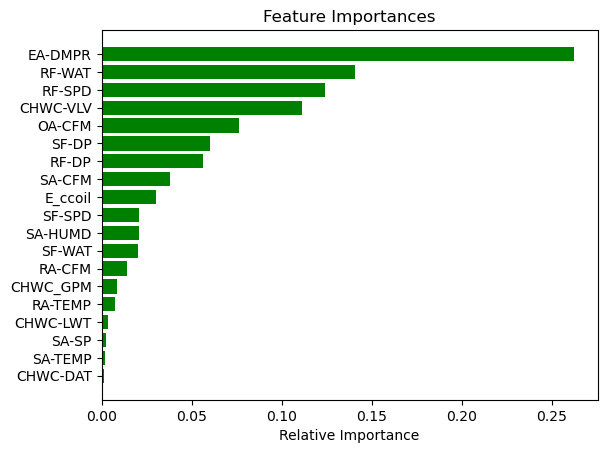

In [9]:
importances = model1.feature_importances_
from matplotlib.pyplot import figure
indices = np.argsort(importances)
features = x_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

In [10]:
d_ = dice_ml.Data(dataframe=df,
                      continuous_features=continuous_features,
                      outcome_name=outcome_name)

# We provide the type of model as a parameter (model_type)
m_ = dice_ml.Model(model=model1, backend="sklearn", model_type='classifier')

In [11]:
exp_genetic = Dice(d_, m_, method="genetic")

In [12]:
y_test[3]

8

In [13]:
# Multiple queries can be given as input at once
query_instances = x_test.iloc[0:20]
genetic = exp_genetic.generate_counterfactuals(query_instances, total_CFs=2, desired_class=0)
genetic.visualize_as_dataframe(show_only_changes=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]

Query instance (original outcome : 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,47.183998,1314.202026,326.794006,54.931999,2.547,72.711998,40.0,2034.120972,373.063995,51.904999,52.466,1.398,58.167999,1924.062012,72.390999,90.480003,0.355,6.446,17.579,0



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,47.2,1314.202,326.794,54.93,2.547,72.7,-,2034.121,373.064,51.905,52.466,1.398,58.2,1924.062,72.391,90.48,0.355,6.45,17.6,-
0,47.2,1327.086,334.993,54.93,2.555,72.7,-,2037.464,373.086,51.905,52.571,1.406,58.2,1934.336,72.391,90.621,0.355,6.4,17.6,-


Query instance (original outcome : 11)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,33.395,1430.161011,278.769989,55.040001,2.248,70.171997,40.0,2319.7229,199.936996,52.118999,54.138,1.391,56.153,1647.072998,71.654999,87.984001,0.399,5.022,14.4,11



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,48.7,1382.138,344.363,55.04,2.583,73.5,-,2106.197,388.647,52.119,52.362,1.368,58.7,1975.635,72.181,90.649,0.366,6.63,18.2,0.0
0,48.7,1380.966,344.363,55.04,2.583,73.5,-,2101.155,389.86,52.119,52.675,1.36,58.7,1968.729,72.181,90.649,0.362,6.63,18.2,0.0


Query instance (original outcome : 2)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,69.786003,1804.978027,378.330994,55.255001,2.911,78.891998,0.0,2389.899902,422.80899,52.012001,51.213001,1.383,63.098,2054.003906,71.971001,89.499001,0.421,10.625,19.738001,2



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,59.5,1715.959,384.187,55.15,2.854,77.8,40.0,2312.894,443.665,52.012,51.317,1.383,62.1,2124.748,72.391,90.228,0.388,8.76,20.9,0.0
0,62.4,1767.496,399.414,55.15,2.872,78.7,40.0,2347.071,449.72,51.905,51.213,1.383,62.9,2173.111,72.812,89.302,0.37,9.39,21.2,0.0


Query instance (original outcome : 8)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,17.349001,600.877991,219.033997,53.749001,1.636,63.956001,100.0,974.815002,952.640991,49.228001,52.779999,1.452,51.036999,1234.719971,70.603996,86.498001,0.381,1.767,4.75,8



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,20.8,530.6,206.149,55.36,1.585,61.1,40.0,871.754,57.958,52.226,61.556,1.452,48.9,1175.36,70.288,89.527,0.359,1.41,5.7,0.0
0,18.0,508.346,214.348,55.04,1.607,61.1,40.0,855.963,68.651,52.119,61.033,1.425,48.7,1212.832,69.868,89.471,0.362,1.45,5.7,0.0


Query instance (original outcome : 1)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,54.326,1755.782959,435.725006,54.825001,2.947,79.257004,100.0,2340.229004,501.963013,51.476002,51.004002,1.406,63.407001,2275.084961,72.181,89.471001,0.351,8.016,20.066999,1



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,66.5,1775.696,419.327,55.04,2.947,79.5,40.0,2348.781,456.125,51.69,50.586,1.406,63.6,2183.927,72.496,89.162,0.399,10.02,21.2,0.0
0,65.8,1758.126,412.299,47.08,2.983,58.9,40.0,2347.071,447.693,51.476,51.004,1.36,63.4,2203.825,72.601,88.91,0.388,10.2,21.5,0.0


Query instance (original outcome : 2)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,42.737999,1079.942017,270.571014,55.147999,2.241,68.817001,0.0,1845.176025,279.072998,52.333,54.451,1.368,55.044998,1647.072998,73.126999,90.901001,0.373,5.629,13.908,2



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,40.8,1001.464,279.941,55.15,2.241,68.4,40.0,1755.2,301.56,52.226,53.929,1.368,54.6,1725.85,71.445,91.322,0.351,5.07,15.1,0.0
0,40.8,1001.464,286.969,55.15,2.241,68.4,40.0,1807.452,320.37,31.994,53.929,1.368,55.0,1763.95,68.291,91.322,0.351,5.07,15.1,0.0


Query instance (original outcome : 2)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,56.008999,1691.362061,371.303009,55.362999,2.81,77.476997,0.0,2338.519043,404.945007,52.333,52.362,1.36,61.812,2005.094971,72.181,89.695,0.403,8.494,18.348,2



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,60.6,1667.936,391.215,55.04,2.832,77.8,40.0,2304.362,441.045,51.798,51.108,1.368,62.2,2122.967,72.181,89.947,0.384,8.98,20.8,0.0
0,53.6,1631.625,380.674,55.58,2.832,77.2,40.0,2270.285,428.287,52.44,52.362,1.379,61.8,2096.324,72.812,89.863,0.381,7.82,19.4,0.0


Query instance (original outcome : 11)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,14.903,515.372986,210.835007,54.394001,1.625,60.299999,100.0,850.231995,589.351013,51.476002,57.063,1.421,48.235001,1267.598999,69.656998,91.293999,0.333,0.903,3.039,11



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,18.7,521.23,204.978,55.26,-,61.0,40.0,863.135,66.634,52.012,60.824,1.429,48.8,1178.481,69.868,89.33,0.355,1.5,5.9,0.0
0,25.7,521.23,203.807,55.36,1.629,61.0,40.0,857.396,59.336,51.905,60.093,1.421,48.8,1189.406,70.078,88.433,0.362,1.75,6.7,0.0


Query instance (original outcome : 6)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,0.0,3419.033936,652.416016,79.688004,3.87,100.0,40.0,3322.050049,730.992004,76.310997,60.092999,1.273,80.0,2556.604004,76.806999,57.330002,0.652,0.109,0.0,6



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,65.9,1809.664,414.641,55.15,2.983,79.6,-,2386.47,467.417,51.798,51.004,1.36,63.7,2203.825,72.601,89.499,0.384,9.8,21.5,0.0
0,65.6,1775.696,407.613,55.04,2.933,79.3,-,2365.901,461.921,51.798,50.899,1.36,63.4,2182.123,72.812,89.359,0.377,9.89,21.6,0.0


Query instance (original outcome : 1)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,55.438999,1732.357056,422.839996,55.147999,2.929,79.129997,100.0,2341.938965,506.584991,51.798,51.213001,1.394,63.312,2280.614014,72.075996,89.415001,0.348,8.022,20.235001,1



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,66.2,1781.552,408.785,55.15,2.933,79.5,40.0,2364.188,452.985,51.798,50.69,1.394,63.6,2192.961,72.707,89.387,0.384,10.01,21.3,0.0
0,66.1,1783.895,411.127,55.15,2.947,79.5,40.0,2364.188,454.727,51.798,50.795,1.398,63.6,2191.153,72.707,89.19,0.37,9.99,21.7,0.0


Query instance (original outcome : 11)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,26.782,867.935974,234.261002,53.640999,2.011,64.417,40.0,1596.930054,6.996,50.405998,53.720001,1.554,51.889999,1399.862061,70.918999,88.544998,0.355,3.941,10.868,11



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,29.0,878.477,265.886,53.64,2.115,67.8,-,1502.983,224.769,50.834,53.825,1.455,54.3,1606.408,71.024,92.219,0.362,4.22,12.2,0.0
0,37.8,851.537,265.886,55.36,2.011,66.2,-,1499.816,221.018,52.333,54.869,1.394,53.0,1593.444,73.863,90.845,0.373,4.34,13.3,0.0


Query instance (original outcome : 2)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,18.657,592.679016,206.149002,53.640999,1.722,61.870998,0.0,1087.25,25.361,50.192001,56.436001,1.398,49.409,1178.480957,70.814003,88.684998,0.37,1.889,6.855,2



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,28.4,576.281,213.177,55.04,1.722,61.8,40.0,1030.765,-4.962,51.69,58.317,1.398,49.6,1286.416,75.02,89.19,0.359,2.31,8.1,0.0
0,30.3,609.078,217.862,55.26,1.722,62.0,40.0,1111.191,28.544,52.333,58.317,1.394,49.6,1330.414,75.125,90.48,0.34,2.59,9.0,0.0


Query instance (original outcome : 1)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,58.358002,1629.282959,416.984009,54.501999,2.947,78.500999,100.0,2254.976074,480.169006,51.262001,50.585999,1.444,62.879002,2249.374023,72.286003,89.190002,0.34,9.382,20.542,1



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,61.3,1676.135,406.442,55.04,2.875,78.1,40.0,2297.54,435.974,51.69,51.004,1.436,62.5,2144.391,72.286,89.611,0.403,9.09,20.9,0.0
0,59.3,1645.681,390.044,54.39,2.882,77.7,40.0,2271.987,422.854,51.155,50.377,1.398,62.2,2137.238,72.286,89.359,0.37,10.12,20.9,0.0


Query instance (original outcome : 1)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,40.119999,1040.116943,308.053009,55.255001,2.313,69.442001,100.0,1751.942993,349.160004,52.118999,54.033001,1.372,55.555,1903.57605,72.600998,91.321999,0.307,4.817,14.779,1



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,42.2,1104.539,293.997,55.26,2.317,69.3,40.0,1836.963,326.79,52.119,53.616,1.379,55.5,1803.969,72.601,91.013,0.34,5.24,15.5,0.0
0,41.5,1104.539,288.141,55.04,2.328,69.3,40.0,1832.039,326.169,52.119,53.72,1.375,55.4,1810.666,72.601,90.957,0.337,5.21,15.4,0.0


Query instance (original outcome : 1)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,49.597,1537.921021,379.502014,55.362999,2.738,76.000999,100.0,2188.834961,461.725006,52.118999,52.153,1.36,60.792,2155.139893,72.181,90.143997,0.329,6.782,18.408001,1



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,49.5,1562.518,367.789,55.36,2.771,76.4,40.0,2221.018,415.51,52.226,52.257,1.383,61.1,2082.176,72.812,90.144,0.366,7.94,19.6,0.0
0,48.5,1554.319,391.215,55.26,2.782,76.3,40.0,2226.106,411.968,52.119,52.153,1.375,61.0,2103.414,73.022,90.284,0.373,7.85,19.3,0.0


Query instance (original outcome : 2)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,96.452003,1886.968994,406.441986,55.577999,3.012,80.582001,0.0,2439.72998,429.59201,52.226002,51.004002,1.356,64.431,2117.625977,72.707001,89.218002,0.443,11.704,21.403,2



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,65.6,1781.552,407.613,55.36,2.955,79.1,40.0,2362.476,456.654,51.905,51.004,1.379,63.3,2185.732,72.707,89.387,0.377,9.82,21.6,0.0
0,65.9,1809.664,414.641,55.15,2.983,79.6,40.0,2386.47,467.417,51.798,51.004,1.36,63.7,2203.825,72.601,89.499,0.384,9.8,21.5,0.0


Query instance (original outcome : 9)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,47.470001,1348.170044,310.394989,55.686001,2.483,72.041,40.0,2109.559082,532.166016,52.653999,52.883999,1.383,57.646,1854.390991,72.390999,90.761002,0.359,7.007,18.01,9



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,49.2,1389.166,340.849,55.15,2.587,73.7,-,2104.516,386.657,52.012,52.466,1.383,59.0,1965.279,72.391,90.48,0.359,6.73,18.3,0.0
0,48.4,1346.999,330.307,55.15,2.587,73.1,-,2060.89,382.626,52.012,52.466,1.387,58.4,1953.223,72.391,90.649,0.359,6.56,17.9,0.0


Query instance (original outcome : 1)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,56.243999,1651.537964,411.127014,55.040001,2.857,77.861,100.0,2280.5,482.334015,51.689999,51.422001,1.383,62.254002,2238.399902,72.390999,89.778999,0.344,8.227,20.316999,1



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,61.1,1674.964,395.9,55.04,2.882,78.1,40.0,2326.555,446.915,51.69,51.004,1.394,62.5,2140.813,72.391,89.751,0.388,9.11,20.9,0.0
0,61.2,1714.788,398.243,55.04,2.843,78.2,40.0,2331.681,453.153,51.69,51.108,1.368,62.5,2160.524,72.391,89.835,0.388,9.02,20.9,0.0


Query instance (original outcome : 3)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,27.503,728.551025,127.671997,55.471001,1.921,64.509003,40.0,1290.536011,259.72699,52.653999,56.332001,1.379,30.0,1069.416992,74.598999,92.219002,0.138,3.31,11.11,3



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,33.5,702.782,229.575,55.26,1.82,63.3,-,1275.152,144.098,52.226,56.332,1.349,50.6,1441.107,74.599,90.705,0.344,3.5,11.0,0.0
0,35.0,755.491,229.575,55.47,1.863,64.2,-,1336.888,173.643,52.333,56.018,1.345,51.3,1485.723,74.599,90.593,0.344,3.63,11.6,0.0


Query instance (original outcome : 8)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,84.705002,1790.921997,377.160004,55.362999,3.012,79.551003,40.0,2364.187988,744.924011,51.798,52.257,1.41,63.632999,1967.004028,72.707001,84.843002,0.45,11.341,26.42,8



Diverse Counterfactual set (new outcome: 0)


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil,y
0,64.4,1746.413,407.613,55.15,2.926,79.0,-,2336.809,447.954,51.798,50.899,1.391,63.2,2155.14,72.707,89.218,0.392,9.76,21.3,0.0
0,62.7,416.984,405.271,55.15,2.893,78.7,-,2341.939,453.673,51.798,51.213,1.368,62.9,2160.524,72.707,89.33,0.392,9.33,21.1,0.0


In [14]:
# Save generated counterfactual examples to disk
genetic.cf_examples_list[8].final_cfs_df.to_csv(path_or_buf='counterfactuaL_f6.csv', index=False)

In [15]:
x_test.to_csv('x6.csv')

In [16]:
query_instance = x_test.iloc[8:9]
imp = exp_genetic.local_feature_importance(query_instance, total_CFs=10,desired_class=0)
print(imp.local_importance)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]

[{'SF-WAT': 1.0, 'RF-WAT': 1.0, 'SA-TEMP': 1.0, 'SF-DP': 1.0, 'SF-SPD': 1.0, 'SA-CFM': 1.0, 'OA-CFM': 1.0, 'CHWC-DAT': 1.0, 'CHWC-LWT': 1.0, 'SA-SP': 1.0, 'RF-SPD': 1.0, 'RA-CFM': 1.0, 'RA-TEMP': 1.0, 'SA-HUMD': 1.0, 'RF-DP': 1.0, 'CHWC_GPM': 1.0, 'E_ccoil': 0.8, 'CHWC-VLV': 0.7, 'EA-DMPR': 0.0}]


In [17]:
query_instances = x_test[0:20]
imp = exp_genetic.global_feature_importance(query_instances,desired_class=0)
print(imp.summary_importance)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.07s/it]


{'CHWC-VLV': 1.0, 'SF-SPD': 1.0, 'RF-SPD': 1.0, 'CHWC_GPM': 1.0, 'OA-CFM': 0.995, 'E_ccoil': 0.99, 'RA-CFM': 0.985, 'SF-WAT': 0.975, 'RF-WAT': 0.955, 'SA-CFM': 0.945, 'SA-TEMP': 0.91, 'SF-DP': 0.91, 'RF-DP': 0.91, 'SA-HUMD': 0.895, 'CHWC-LWT': 0.825, 'SA-SP': 0.775, 'CHWC-DAT': 0.655, 'EA-DMPR': 0.65, 'RA-TEMP': 0.635}


In [18]:
x_test.iloc[8:9]


,CHWC-VLV,SF-WAT,RF-WAT,SA-TEMP,SF-DP,SF-SPD,EA-DMPR,SA-CFM,OA-CFM,CHWC-DAT,CHWC-LWT,SA-SP,RF-SPD,RA-CFM,RA-TEMP,SA-HUMD,RF-DP,CHWC_GPM,E_ccoil
4277,0.0,3419.034,652.416,79.688,3.87,100.0,40.0,3322.05,730.992,76.311,60.093,1.273,80.0,2556.604,76.807,57.33,0.652,0.109,0.0


In [19]:
y_test[8]

6